<a href="https://colab.research.google.com/github/gitgitWi/python-lecture/blob/master/lec_20200429_RNN_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.utils import np_utils

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [0]:
song = [3,2,1,2,3,3,3,2,2,2,
        3,3,3,3,2,1,2,3,3,3,
        2,2,3,2,1,]

idx2code = {
    3: '미',
    2: '레',
    1: '도'
}

In [0]:
code2idx = dict([ (v, k) for k,v in idx2code.items() ])
code2idx

{'도': 1, '레': 2, '미': 3}

In [0]:
np.random.seed(2020)

class LossHistory (keras.callbacks.Callback) :
    def __init__(self) : self.losses = []
    def on_epoch_end(self, batch, logs={}) :
        self.losses.append(logs.get('loss'))

def seq2dataset (seq, window_size) : 
    dataset = []
    for i in range(len(seq) - window_size) :
        subset = seq[i:(i+1+window_size)]
        dataset.append([ i for i in subset ])
    return np.array(dataset)

In [0]:
dataset = seq2dataset(song, window_size=4)
print (dataset.shape)
print (dataset)

(21, 5)
[[3 2 1 2 3]
 [2 1 2 3 3]
 [1 2 3 3 3]
 [2 3 3 3 2]
 [3 3 3 2 2]
 [3 3 2 2 2]
 [3 2 2 2 3]
 [2 2 2 3 3]
 [2 2 3 3 3]
 [2 3 3 3 3]
 [3 3 3 3 2]
 [3 3 3 2 1]
 [3 3 2 1 2]
 [3 2 1 2 3]
 [2 1 2 3 3]
 [1 2 3 3 3]
 [2 3 3 3 2]
 [3 3 3 2 2]
 [3 3 2 2 3]
 [3 2 2 3 2]
 [2 2 3 2 1]]


In [0]:
x_train = dataset[:, 0:4]
y_train = dataset[:, 4]

max_idx_value = 3

In [0]:
x_train = x_train / float(max_idx_value)
x_train

array([[1.        , 0.66666667, 0.33333333, 0.66666667],
       [0.66666667, 0.33333333, 0.66666667, 1.        ],
       [0.33333333, 0.66666667, 1.        , 1.        ],
       [0.66666667, 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 0.66666667],
       [1.        , 1.        , 0.66666667, 0.66666667],
       [1.        , 0.66666667, 0.66666667, 0.66666667],
       [0.66666667, 0.66666667, 0.66666667, 1.        ],
       [0.66666667, 0.66666667, 1.        , 1.        ],
       [0.66666667, 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 0.66666667],
       [1.        , 1.        , 0.66666667, 0.33333333],
       [1.        , 0.66666667, 0.33333333, 0.66666667],
       [0.66666667, 0.33333333, 0.66666667, 1.        ],
       [0.33333333, 0.66666667, 1.        , 1.        ],
       [0.66666667, 1.        , 1.        , 1.        ],
       [1.        , 1.        ,

In [0]:
len(x_train), len(y_train)

(21, 21)

In [0]:
x_train = np.reshape(x_train, (len(y_train), 4, 1))
y_train = np_utils.to_categorical(y_train)

one_hot_vec_size = y_train.shape[1]
one_hot_vec_size

4

In [0]:
model = Sequential()
model.add(LSTM( 128, batch_input_shape = (1,4,1), stateful=True))
model.add(Dense(one_hot_vec_size, activation='softmax'))

In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
num_epochs = 2000

history = LossHistory()

for idx in range(num_epochs) : 
    print (f'epochs : {idx}')
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2, shuffle=False,callbacks=[history] )
    model.reset_states()

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 - 0s - loss: 0.2056 - accuracy: 0.9524
epochs : 334
Epoch 1/1
 - 0s - loss: 0.1981 - accuracy: 0.9524
epochs : 335
Epoch 1/1
 - 0s - loss: 0.1877 - accuracy: 0.9524
epochs : 336
Epoch 1/1
 - 0s - loss: 0.1741 - accuracy: 0.9524
epochs : 337
Epoch 1/1
 - 0s - loss: 0.1609 - accuracy: 0.9524
epochs : 338
Epoch 1/1
 - 0s - loss: 0.1460 - accuracy: 0.9524
epochs : 339
Epoch 1/1
 - 0s - loss: 0.3133 - accuracy: 0.9048
epochs : 340
Epoch 1/1
 - 0s - loss: 0.2196 - accuracy: 0.9524
epochs : 341
Epoch 1/1
 - 0s - loss: 0.1419 - accuracy: 0.9524
epochs : 342
Epoch 1/1
 - 0s - loss: 0.1617 - accuracy: 0.9048
epochs : 343
Epoch 1/1
 - 0s - loss: 0.2552 - accuracy: 0.9048
epochs : 344
Epoch 1/1
 - 0s - loss: 0.3651 - accuracy: 0.8571
epochs : 345
Epoch 1/1
 - 0s - loss: 0.4244 - accuracy: 0.8095
epochs : 346
Epoch 1/1
 - 0s - loss: 1.2730 - accuracy: 0.6190
epochs : 347
Epoch 1/1
 - 0s - loss: 0.5887 - accuracy: 0.6667
epochs : 348
Epoch 1/1
 - 0s - loss: 0.441

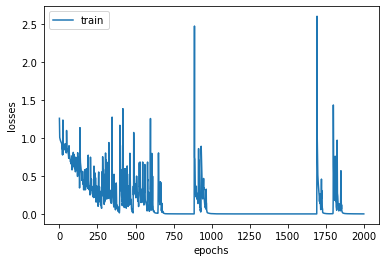

In [0]:
plt.plot(history.losses)
plt.xlabel('epochs')
plt.ylabel('losses')
plt.legend(['train'], loc = 'best')
plt.show()

In [0]:
scores = model.evaluate(x_train, y_train, batch_size=1)
print (f"{model.metrics_names[1]} : {scores[1]*100:.2f}%")
model.reset_states()

21/21 [==============================] - 0s 3ms/step
accuracy : 100.00%


In [0]:
pred_cnt = len(song)-4

seq_out = ['미','레','도','레']
pred_out = model.predict(x_train, batch_size=1)

for i in range(pred_cnt) :
    idx = np.argmax(pred_out[i])
    seq_out.append(idx2code[idx])

model.reset_states()

print (f"one step prediction : \n{seq_out}")

one step prediction : 
['미', '레', '도', '레', '미', '미', '미', '레', '레', '레', '미', '미', '미', '미', '레', '도', '레', '미', '미', '미', '레', '레', '미', '레', '도']


In [0]:
seq_in = [3,2,1,2,]
seq_out = seq_in
seq_in = [ i / float(max_idx_value) for i in seq_in ]
# seq_in

for i in range(pred_cnt) : 
    sample_in = np.reshape(np.array(seq_in), (1,4,1))
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx)
    seq_in.append( idx / float(max_idx_value) )
    seq_in.pop(0)
    # print (seq_out)

model.reset_states()

# [ song[i] == seq_out[i] for i in range(len(song)) ]
# seq_out
# [code2idx[i] for i in seq_out]
list ( zip (song,  [idx2code[i] for i in song], seq_out, [idx2code[i] for i in seq_out], [ (song[i] == seq_out[i]) for i in range(len(song)) ]) )

[(3, '미', 3, '미', True),
 (2, '레', 2, '레', True),
 (1, '도', 1, '도', True),
 (2, '레', 2, '레', True),
 (3, '미', 3, '미', True),
 (3, '미', 3, '미', True),
 (3, '미', 3, '미', True),
 (2, '레', 2, '레', True),
 (2, '레', 2, '레', True),
 (2, '레', 2, '레', True),
 (3, '미', 3, '미', True),
 (3, '미', 3, '미', True),
 (3, '미', 3, '미', True),
 (3, '미', 3, '미', True),
 (2, '레', 2, '레', True),
 (1, '도', 1, '도', True),
 (2, '레', 2, '레', True),
 (3, '미', 3, '미', True),
 (3, '미', 3, '미', True),
 (3, '미', 3, '미', True),
 (2, '레', 2, '레', True),
 (2, '레', 2, '레', True),
 (3, '미', 3, '미', True),
 (2, '레', 2, '레', True),
 (1, '도', 1, '도', True)]